In [1]:
%matplotlib inline

In [2]:
from SALib.test_functions import Sobol_G
from SALib.sample.saltelli import sample
from SALib.analyze.sobol import analyze
import numpy as np
import matplotlib

matplotlib.rc('figure', figsize=(12, 4))

In [3]:
def sobol_g(t, a):
    """Original Sobol-G"""
    return np.prod((np.abs(4*t -2) + a) / (1 + a))


def run_model(vals, a):
    Y = np.empty(vals.shape[0])
    for i, t in enumerate(vals):
        Y[i] = sobol_g(t, a)
    return Y

In [4]:
problem = {
    'num_vars': 6,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6'],
    'bounds': [[0, 1],
               [0, 1],
               [0, 1],
               [0, 1],
               [0, 1],
               [0, 1]]
}

param_values = sample(problem, 10000)


param_a = np.array([0, 0.5, 3, 9, 99, 99])
Y = run_model(param_values, param_a)

Si = analyze(problem, Y, num_resamples=1000)

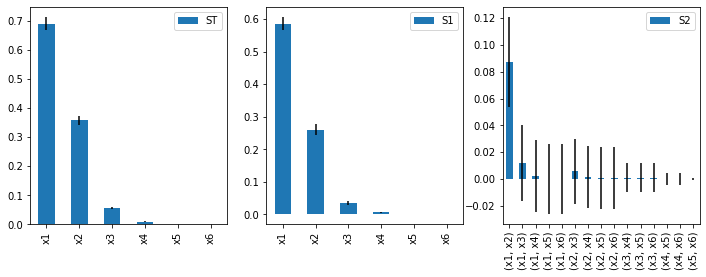

In [5]:
Si.plot();